**1) Load and Inspect the Data**

In [26]:
import pandas as pd

# Load the dataset
file_path = 'uber.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataframe
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [27]:
# Display dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [28]:
# Display basic statistics
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


**2) Data Preprocessing**

In [29]:
# Check for missing values
print(data.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [30]:
#'pickup_datetime' needs to be converted to datetime type
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [31]:
#Handling Rows with Zero Coordinates
data = data[~(
    ((data['pickup_longitude'] == 0) & (data['pickup_latitude'] == 0)) |
    ((data['dropoff_longitude'] == 0) & (data['dropoff_latitude'] == 0))
)]


data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1


In [32]:
# Identify and display problematic latitude and longitude entries
problematic = data[(data['pickup_latitude'] < -90) | (data['pickup_latitude'] > 90) |
                 (data['dropoff_latitude'] < -90) | (data['dropoff_latitude'] > 90) |
                 (data['pickup_longitude'] < -180) | (data['pickup_longitude'] > 180) |
                 (data['dropoff_longitude'] < -180) | (data['dropoff_longitude'] > 180)]
print(problematic[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

        pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
4949         -748.016667        40.739957         -74.003570         40.734192
32549         -74.016055        40.715155        -737.916665         40.697862
48506        -735.200000        40.770092         -73.980187         40.765530
56617         -73.960828       404.433332         -73.988357         40.769037
61793         -73.951385       401.066667         -73.982110         40.754117
75851       -1340.648410      1644.421482       -3356.666300        872.697628
91422          57.418457      1292.016128        1153.572603       -881.985513
103745       -736.216667        40.767035         -73.982377         40.725562
139447        -74.011042        40.709780         -73.983163        493.533332
144253       -768.550000        40.757812         -73.997040         40.740007
161652       -735.433332        40.740605         -74.006373         40.739607
199936       -736.400000        40.774307         -7

In [33]:
# removing problematic data
data = data[~data.index.isin(problematic.index)]
#Remove rows with NaN in any of these columns
data_cleaned = data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

**3) Feature Engineering**

In [ ]:
%pip install geopy

In [34]:
from geopy.distance import geodesic

# Explicitly copying the data after filtering to avoid SettingWithCopyWarning error
data_cleaned = data.dropna(subset=[
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]).copy()

# Define the function to calculate distances safely
def calculate_distance_safe(row):
    if pd.notna(row['pickup_latitude']) and pd.notna(row['pickup_longitude']) and \
       pd.notna(row['dropoff_latitude']) and pd.notna(row['dropoff_longitude']):
        pickup = (row['pickup_latitude'], row['pickup_longitude'])
        dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
        return geodesic(pickup, dropoff).miles
    else:
        return None

# Assigning the distance calculation to the new column
data_cleaned['trip_distance'] = data_cleaned.apply(calculate_distance_safe, axis=1)

In [35]:
# Calculate Q1, Q3 and IQR for fare_amount
Q1_fare = data_cleaned['fare_amount'].quantile(0.25)
Q3_fare = data_cleaned['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Calculate Q1, Q3 and IQR for trip_distance
Q1_distance = data_cleaned['trip_distance'].quantile(0.25)
Q3_distance = data_cleaned['trip_distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Define bounds for outliers
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Filter out outliers in fare_amount and trip_distance
data_cleaned = data_cleaned[(data_cleaned['fare_amount'] >= lower_bound_fare) & (data_cleaned['fare_amount'] <= upper_bound_fare) &
                     (data_cleaned['trip_distance'] >= lower_bound_distance) & (data_cleaned['trip_distance'] <= upper_bound_distance)]

This code removes rows where either the pickup or dropoff coordinates are exactly zero for both latitude and longitude. This effectively filters out data points that are highly likely to be errors or default entries where no valid GPS data was received or recorded.

The between(-0.5, 0.5) function filters out longitudes that are very close to zero but not precisely zero, under the assumption that these are also likely to be errors (since legitimate coordinates for places in the Western Hemisphere, particularly in the United States, are significantly negative). This filter ensures that any slight deviations near zero that are not exactly zero are also excluded.

In [37]:
# Filter out entries with zero coordinates that are likely errors
data_cleaned = data_cleaned[~((data_cleaned['pickup_longitude'] == 0) & (data_cleaned['pickup_latitude'] == 0))]
data_cleaned = data_cleaned[~((data_cleaned['dropoff_longitude'] == 0) & (data_cleaned['dropoff_latitude'] == 0))]

# Also, consider removing or examining entries where coordinates are near zero
data_cleaned = data_cleaned[~((data_cleaned['pickup_longitude'].between(-0.5, 0.5)) & (data_cleaned['pickup_longitude'] != 0))]
data_cleaned = data_cleaned[~((data_cleaned['dropoff_longitude'].between(-0.5, 0.5)) & (data_cleaned['dropoff_longitude'] != 0))]


In [38]:
# Remove entries with incorrect geographic coordinates
data_cleaned = data_cleaned[
    (data_cleaned['pickup_longitude'].between(-74.2591, -73.7004)) &
    (data_cleaned['pickup_latitude'].between(40.4774, 40.9176)) &
    (data_cleaned['dropoff_longitude'].between(-74.2591, -73.7004)) &
    (data_cleaned['dropoff_latitude'].between(40.4774, 40.9176))
]
data_cleaned = data_cleaned[data_cleaned['fare_amount'] >= 0]
# Exclude high fares that are confirmed as anomalies or special cases
data_cleaned = data_cleaned[~data_cleaned['fare_amount'].isin([220.0, 499.0])]

# Recalculate trip distances after cleaning the coordinates
data_cleaned['trip_distance'] = data_cleaned.apply(calculate_distance_safe, axis=1)


In [43]:
# Recalculate descriptive statistics post removal of high fare anomalies
data_cleaned[['fare_amount', 'trip_distance']].describe()

,fare_amount,trip_distance
count,175931.000000,175931.000000
mean,8.783745,1.489192
std,3.960178,1.007585
min,0.000000,0.000000
25%,5.700000,0.738526
50%,8.000000,1.218860
75%,11.000000,1.993598
max,22.200000,4.903302


**4) Descriptive Statistics and Visualization**

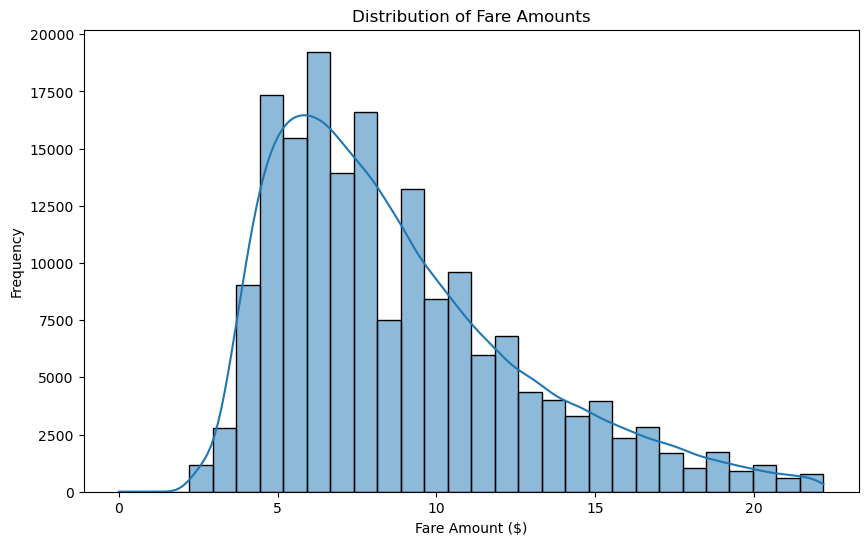

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of fare amounts
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


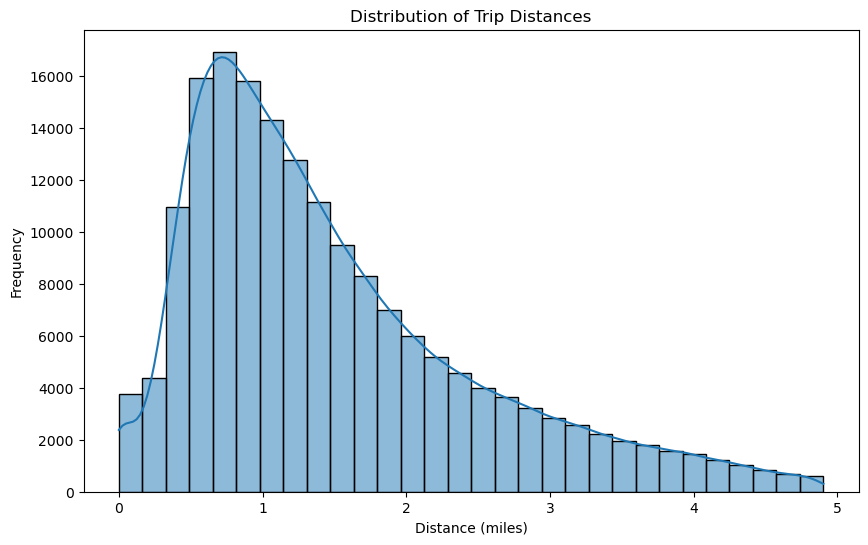

In [41]:
# Histogram of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['trip_distance'].dropna(), bins=30, kde=True)  # Ensure to drop any NaNs
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

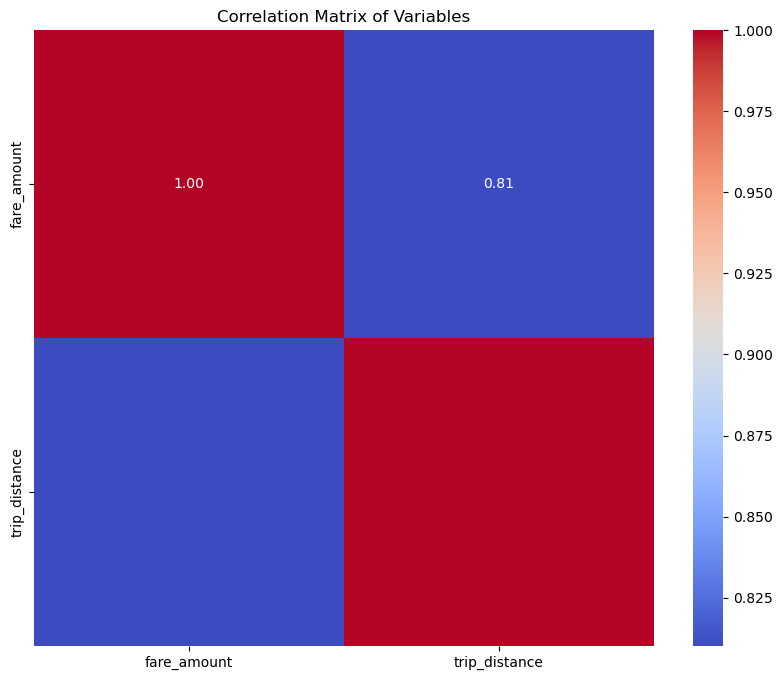

In [42]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[['fare_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [25]:
data_cleaned.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'pickup_cluster', 'predicted_fare'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

# Assuming 'data_cleaned' is already preprocessed and ready for modeling
# Features and target
X = data_cleaned[['trip_distance', 'passenger_count','pickup_datetime', 'pickup_longitude',
                  'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]  # You might want to include more features here
y = data_cleaned['fare_amount']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Training and predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Display results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R-squared: {metrics['R-squared']:.2f}")


Linear Regression - MSE: 4.53, R-squared: 0.61
Decision Tree - MSE: 8.56, R-squared: 0.26
Random Forest - MSE: 5.98, R-squared: 0.48
Gradient Boosting - MSE: 4.35, R-squared: 0.62


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold

# Initialize the model to use within RFE
model = LinearRegression()

# Create RFECV object
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (MSE)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Checking which features were selected
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Parameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Test MSE:", mse)
print("Test R-squared:", r2)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score (MSE): 4.246157805273682
Test MSE: 4.351811956508918
Test R-squared: 0.6235180685631276


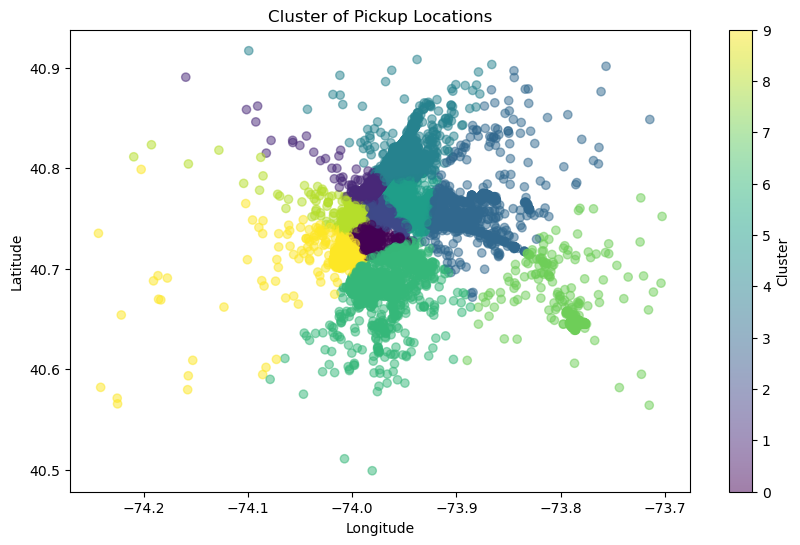

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering on pickup coordinates
kmeans = KMeans(n_clusters=10, random_state=42)
data_cleaned['pickup_cluster'] = kmeans.fit_predict(data_cleaned[['pickup_latitude', 'pickup_longitude']])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['pickup_longitude'], data_cleaned['pickup_latitude'], c=data_cleaned['pickup_cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [23]:
# Predict fares using the best-performing model (assuming it's Random Forest here)
best_model = models['Random Forest']
data_cleaned['predicted_fare'] = best_model.predict(data_cleaned[['trip_distance', 'passenger_count']])

# Example output
print(data_cleaned[['predicted_fare', 'pickup_cluster']].head())


   predicted_fare  pickup_cluster
0           7.459               8
1           8.246               0
2          14.082               8
3           5.851               1
4          14.610               3
